In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
from fontTools.ttLib import TTFont
from PIL import Image, ImageDraw, ImageFont

In [2]:
img_size = 96
ttf_path = "../data/raw/ttf/"
save_path = "../data/raw/nointer"

In [3]:
def get_existing_chars(filename):
    ttfont = TTFont(filename)
    return list({chr(key) for table in ttfont['cmap'].tables for key in table.cmap.keys()})

def get_image(font, char, size=img_size):
    img = Image.new('L', (1000,1000), 255)

    draw = ImageDraw.Draw(img)
    draw.text((200,200), char, font=font)

    npimg = 255 - np.array(img)
    wmin = npimg.sum(0).nonzero()[0].min()
    wmax = npimg.sum(0).nonzero()[0].max()
    hmin = npimg.sum(1).nonzero()[0].min()
    hmax = npimg.sum(1).nonzero()[0].max()

    npimg = 255 - npimg[hmin:hmax+1,wmin:wmax+1]

    whdiff = (wmax-wmin) - (hmax-hmin)
    wmargin = abs(whdiff) // 2 if whdiff < 0 else 0
    hmargin = abs(whdiff) // 2 if whdiff >= 0 else 0

    npimg = np.pad(npimg, ((hmargin, hmargin), (wmargin, wmargin)),
                       'constant', constant_values=255)
    img = Image.fromarray(npimg)
    
    return img

# utf-8
def get_all_korean():

    def nextKorLetterFrom(letter):
        lastLetterInt = 15572643
        if not letter:
            return '가'
        a = letter
        b = a.encode('utf8')
        c = int(b.hex(), 16)

        if c == lastLetterInt:
            return False

        d = hex(c + 1)
        e = bytearray.fromhex(d[2:])

        flag = True
        while flag:
            try:
                r = e.decode('utf-8')
                flag = False
            except UnicodeDecodeError:
                c = c+1
                d = hex(c)
                e = bytearray.fromhex(d[2:])
        return e.decode()

    returns = []
    flag = True
    k = ''
    while flag:
        k = nextKorLetterFrom(k)
        if k is False:
            flag = False
        else:
            returns.append(k)
    return returns

In [4]:
ak = get_all_korean()
fonts = [f for f in os.listdir(ttf_path) if ".ttf" in f]

In [5]:
font_size = 70
for fontname in tqdm(fonts):
    filename = f"{ttf_path}/{fontname}"
    font = ImageFont.truetype(filename,font_size)
    existing_chars = get_existing_chars(filename)
    iter_chars = list(set(existing_chars).intersection(set(ak)))
    for l in iter_chars:
        pngpath = f"{save_path}/{fontname.replace('.ttf','')}__{l}.png"
        # if not os.path.exists(pngpath):
        img = get_image(font, l)
        with open(pngpath, "wb") as f:
            img.save(f, "PNG")

100%|██████████| 72/72 [51:48<00:00, 43.17s/it] 


In [35]:
a = get_image(font, '가')

In [45]:
max(a.size)

64

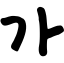

In [37]:
a